# TP N°3 - Potencia
__UNLZ - Facultad de Ingeniería__       
__Electrotecnia__      
__Alumno:__ Daniel Antonio Lorenzo

## Ejercicio N°1
Calcular las potencias activa (P), reactiva (Q) y aparente (S) del siguiente circuito y dibujar el fasorial de potencias.

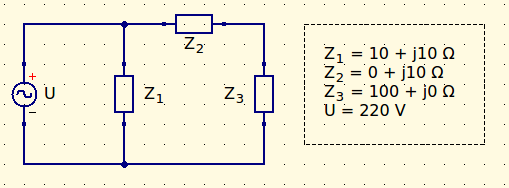

### Solución

__Datos:__
$\left\{
\begin{array}{l}
Z_1 = 10 + j10 \, \Omega \\
Z_2 = 0 + j10 \, \Omega \\
Z_3 = 100 + j0 \, \Omega \\
U_\mathrm{rms} = 220 \, \mathrm{V}
\end{array}
\right.$

Cálculo de $Z_{eq} = (Z_2 + Z_3) \,  || \, Z_1$

$$ Z_{eq} = {Z_1 \cdot (Z_2 + Z_3) \over Z_1 + Z_2 + Z_3 } = 12,71 \angle 40,41^\circ \, \Omega = 9,68 + j8,24 \, \Omega $$

Cálculo de $I_\mathrm{rms}$

$$ I_\mathrm{rms} = {U_\mathrm{rms} \over Z_{eq} } = 17,31 \angle -40,41^\circ \, \mathrm{A} $$

Cálculo de $S$
$$ S = U_\mathrm{rms} I_\mathrm{rms}^* = 3807,37 \angle 40,41^\circ \, \mathrm{VA} $$

$$ S = 2899,21 + j2467,92 \, \mathrm{VA} $$

Entonces
$$ P = 2899,21 \, \mathrm{W} $$

$$ Q = 2467,92 \, \mathrm{VAr} $$

In [ ]:
import math, cmath

In [ ]:
# Datos:
Z1 = 10 + 10j # Ohm
Z2 = 0 + 10j # Ohm
Z3 = 100 + 0j # Ohm
Urms = 220 # V

In [ ]:
# Defino una función que calcula elementos en paralelo
def prl(x,y):
    return (x*y)/(x + y)

In [ ]:
# (Z2 + Z3) || Z1
Zeq = prl(Z2 + Z3, Z1)
Irms = Urms/Zeq

In [ ]:
# Potencia aparente (S):
S = Urms*( Irms.conjugate() )
phi = cmath.phase(S)
# Potencia activa (P):
P = S.real
# Potencia reactiva (Q):
Q = S.imag

In [ ]:
#@title Imprime resultados:
print('Resultados:')
print('---------------------------------------')
print('Zeq = (%.2f < %.2f°) Ohm'%(abs(Zeq) , math.degrees( cmath.phase(Zeq) ) ) )
print('Zeq = {:.2f} Ohm'.format(Zeq))
print('Irms = (%.2f < %.2f°) A'%(abs(Irms) , math.degrees( cmath.phase(Irms) ) ))
print('---------------------------------------')
print('S = (%.2f < %.2f°) VA'%(abs(S) , math.degrees( phi ) ))
print('S = {:.2f} VA'.format(S))
print('P = %.2f W'%P)
print('Q = %.2f VAr'%abs(Q) ) 
print('---------------------------------------')

Resultados:
---------------------------------------
Zeq = (12.71 < 40.41°) Ohm
Zeq = 9.68+8.24j Ohm
Irms = (17.31 < -40.41°) A
---------------------------------------
S = (3807.37 < 40.41°) VA
S = 2899.21+2467.92j VA
P = 2899.21 W
Q = 2467.92 VAr
---------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

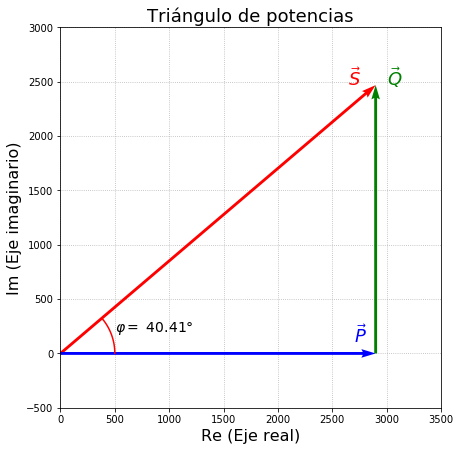

In [ ]:
#@title Gráfico:
%matplotlib inline
plt.figure(figsize=(7,7))
ax = plt.gca()
ax.quiver(0,0,P,Q,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,P,0,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(P,0,0,Q,angles='xy',scale_units='xy',scale=1,color='green')   
plt.text(P - 250, Q, r'$\vec S$', fontsize=18, color='red', fontweight='bold')
plt.text(P - 200,  100, r'$\vec P$', fontsize=18, color='blue', fontweight='bold')
plt.text(P + 100, Q, r'$\vec Q$', fontsize=18, color='green', fontweight='bold')
plt.text(500,  200, r'$\varphi =$ %.2f°'%( math.degrees(phi) ), fontsize=14)
theta = np.linspace(0, phi, 100) 
x1 = 500 * np.cos(theta)
x2 = 500 * np.sin(theta)
plt.plot(x1, x2, color='red')
ax.set_xlim([0,3500])
ax.set_ylim([-500,3000])
ax.set_aspect('equal')
plt.title('Triángulo de potencias', fontsize=18)
plt.xlabel('Re (Eje real)',  fontsize=16)
plt.ylabel('Im (Eje imaginario)',  fontsize=16)
plt.grid(linestyle=":")
ax.set_axisbelow(True)
plt.draw()
plt.show()

In [ ]:
%reset -s -f